## Redução de dimensionalidade

In [1]:
import pandas as pd
import seaborn as sns
import sklearn.decomposition
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados tratados/v1/data.csv')
df = df.drop(['Mau', 'Maa', 'Mag'], axis=1)

In [3]:
X = df.iloc[:,1:9]

In [4]:
pca = sklearn.decomposition.PCA(n_components=2)

In [5]:
pca.fit(X)

PCA(n_components=2)

In [6]:
X_pca = pca.transform(X)

In [7]:
print('Auto valores\n',pca.explained_variance_,'\n')
print('Auto vetores\n',pca.components_,'\n')
print('Variância\n',pca.explained_variance_ratio_,'\n')

Auto valores
 [3.48572148e+07 1.10774871e+04] 

Auto vetores
 [[-1.98150549e-05 -9.94044353e-01 -8.49610558e-02  1.25743498e-03
   6.81611414e-02 -9.46097361e-04 -4.47933850e-04 -2.97068232e-03]
 [ 1.63909352e-04  3.82073857e-02  3.26558853e-03  8.21383297e-01
   5.52238816e-01  7.50803069e-02  1.40614772e-02  1.14265027e-01]] 

Variância
 [9.99369771e-01 3.17595821e-04] 



In [8]:
novo_df = pd.DataFrame(X_pca,columns=['PC1','PC2'])
novo_df['Target'] = df['Resultado']

In [34]:
lista = []

for value in list(novo_df['Target'].values):
    if value == 'FI': lista.append('NF')
    else: lista.append(value)

In [36]:
novo_df['Target 2'] = lista

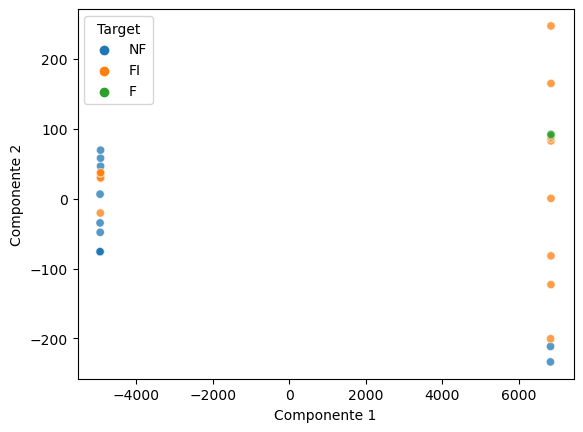

In [42]:
sns.scatterplot(data = novo_df, x = 'PC1', y = 'PC2', hue = 'Target', alpha=0.75)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

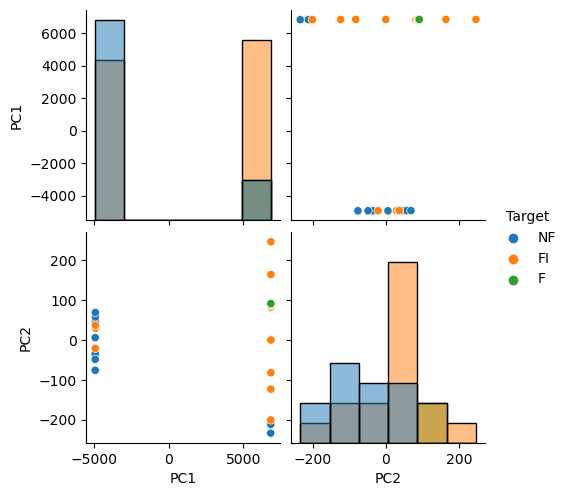

In [20]:
sns.pairplot(novo_df, vars=['PC1','PC2'], hue='Target', diag_kind='hist')